# **STEP 1: GETTING THE DATA**

In [2]:
pip install nltk==3.3 

     |████████████████████████████████| 1.4MB 2.8MB/s 
  Created wheel for nltk: filename=nltk-3.3-cp36-none-any.whl size=1394472 sha256=3d9a06b4db1636885e11f7a506117dc647f58e0cf09f7391d2681c9aceb49e43
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [0]:
import nltk
import matplotlib.pyplot as plt

In [5]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [0]:
from nltk.corpus import twitter_samples

In [0]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [8]:
print(positive_tweets[5])

@BhaktisBanter @PallaviRuhail This one is irresistible :)
#FlipkartFashionFriday http://t.co/EbZ0L2VENM


In [9]:
print(negative_tweets[0])

hopeless for tmr :(


# **STEP 2: PREPROCESSING THE DATA TO USEABLE FORM**

**TOKENISATION**:


In [10]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
positive_tokenised = twitter_samples.tokenized('positive_tweets.json')
negative_tokenised = twitter_samples.tokenized('negative_tweets.json')

In [12]:
print(positive_tokenised[6])
print(negative_tokenised[0])

['We', "don't", 'like', 'to', 'keep', 'our', 'lovely', 'customers', 'waiting', 'for', 'long', '!', 'We', 'hope', 'you', 'enjoy', '!', 'Happy', 'Friday', '!', '-', 'LWWF', ':)', 'https://t.co/smyYriipxI']
['hopeless', 'for', 'tmr', ':(']


**LEMMETISING:**

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [0]:
positive_lemmatized = [None]*len(positive_tweets)
for i in range (len(positive_tokenised)):
  positive_lemmatized[i] = [None] * len(positive_tokenised[i])
  for j in range (len(positive_tokenised[i])):
      positive_lemmatized[i][j] = lemmatizer.lemmatize(positive_tokenised[i][j]) 

In [0]:
negative_lemmatized = [None]*len(negative_tweets)
for i in range (len(negative_tokenised)):
  negative_lemmatized[i] = [None] * len(negative_tokenised[i])
  for j in range (len(negative_tokenised[i])):
      negative_lemmatized[i][j] = lemmatizer.lemmatize(negative_tokenised[i][j]) 

In [17]:
print(positive_lemmatized[0])
print(negative_lemmatized[0])

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'member', 'in', 'my', 'community', 'this', 'week', ':)']
['hopeless', 'for', 'tmr', ':(']


**REMOVING STOP WORDS:**

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [0]:
extra_words = ['im','co', 'hi', 'hey', 'hello', 'hai', 'someone', 'I am', 'see', 'thing', 'need', 'know', 'that', 'this', 'say', 'come', 'got', 'get', "I'm", '...', '..', 'I', 'i', 'ME', 'u', 'Hi', 'Hey', 'via', "I'll"]

In [21]:
import string
punctuation = string.punctuation
punctuation = list(punctuation)
print(punctuation)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [0]:
stop_words = stop_words + extra_words + punctuation

In [23]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [0]:
remove_list = ["no","not","don’t","aren’t","couldn’t","didn’t","mustn’t","hasn’t","haven’t","doesn’t","hadn’t", "isn’t","mightn’t","needn’t", "shan’t", "shouldn’t","wasn’t","weren’t","won’t","won","wouldn’t","can’t","don’t","aren’t","couldn’t","didn’t","mustnt","hasnt","havent","doesnt","hadnt", "isnt","mightnt","neednt", "shant", "shouldnt","wasnt","werent","wont","wouldnt","cant","donot","arenot","couldnot","didnot","mustnot","hasnot","havenot","doesnot","hadnot", "isnot","mightnot","neednot", "shallnot", "shouldnot","wasnot","werenot","willnot","wouldnot","cannot"]

In [0]:
stop_words = [word for word in stop_words if word not in remove_list]

In [26]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

In [27]:
positive_cleaned = [None]*len(positive_tweets)
for i in range(len(positive_tweets)):
  ans = []
  for w in positive_tokenised[i]:
    if(w.startswith('http:/') or w.startswith('https:/') or w.startswith('@')):
      continue;
    if w not in stop_words: 
        ans.append(w)
  positive_cleaned[i] = ans
print(positive_cleaned[6])

['We', 'like', 'keep', 'lovely', 'customers', 'waiting', 'long', 'We', 'hope', 'enjoy', 'Happy', 'Friday', 'LWWF', ':)']


In [28]:
negative_cleaned = [None]*len(negative_tweets)
for i in range(len(negative_tweets)):
  ans = []
  for w in negative_tokenised[i]:
    if(w.startswith('http:/') or w.startswith('https:/') or w.startswith('@')):
      continue; 
    if w not in stop_words: 
        ans.append(w)
  negative_cleaned[i] = ans
print(negative_cleaned[0])

['hopeless', 'tmr', ':(']


In [0]:
positive_string_cleaned = [None] * len(positive_cleaned)
for i in range(len(positive_cleaned)):
  positive_string_cleaned[i] = " ".join(positive_cleaned[i])

negative_string_cleaned = [None] * len(negative_cleaned)
for i in range(len(negative_cleaned)):
  negative_string_cleaned[i] = " ".join(negative_cleaned[i])

In [30]:
print(positive_string_cleaned[6])

We like keep lovely customers waiting long We hope enjoy Happy Friday LWWF :)


**BUILDING THE DATASET:**

In [0]:
import pandas as pd

In [32]:
positive_data = pd.DataFrame(positive_tweets)
negative_data = pd.DataFrame(negative_tweets)

positive_data = positive_data.rename(columns={0:'Raw Tweets'})
negative_data = negative_data.rename(columns={0:'Raw Tweets'})

print(positive_data)
print(negative_data)

                                             Raw Tweets
0     #FollowFriday @France_Inte @PKuchly57 @Milipol...
1     @Lamb2ja Hey James! How odd :/ Please call our...
2     @DespiteOfficial we had a listen last night :)...
3                                  @97sides CONGRATS :)
4     yeaaaah yippppy!!!  my accnt verified rqst has...
...                                                 ...
4995  @chriswiggin3 Chris, that's great to hear :) D...
4996  @RachelLiskeard Thanks for the shout-out :) It...
4997            @side556 Hey!  :)  Long time no talk...
4998  @staybubbly69 as Matt would say. WELCOME TO AD...
4999  @DanielOConnel18 you could say he will have eg...

[5000 rows x 1 columns]
                                             Raw Tweets
0                                   hopeless for tmr :(
1     Everything in the kids section of IKEA is so c...
2     @Hegelbon That heart sliding into the waste ba...
3     “@ketchBurning: I hate Japanese call him "bani...
4              Dang sta

In [0]:
positive_string_cleaned = [None] * len(positive_cleaned)
for i in range(len(positive_cleaned)):
  positive_string_cleaned[i] = " ".join(positive_cleaned[i])

negative_string_cleaned = [None] * len(negative_cleaned)
for i in range(len(negative_cleaned)):
  negative_string_cleaned[i] = " ".join(negative_cleaned[i])

In [0]:
positive_data['Cleaned'] = positive_string_cleaned
negative_data['Cleaned'] = negative_string_cleaned

positive_data['Class'] = 'Positive'
negative_data['Class'] = 'Negative'

In [35]:
print(positive_data)
print(negative_data)

                                             Raw Tweets  ...     Class
0     #FollowFriday @France_Inte @PKuchly57 @Milipol...  ...  Positive
1     @Lamb2ja Hey James! How odd :/ Please call our...  ...  Positive
2     @DespiteOfficial we had a listen last night :)...  ...  Positive
3                                  @97sides CONGRATS :)  ...  Positive
4     yeaaaah yippppy!!!  my accnt verified rqst has...  ...  Positive
...                                                 ...  ...       ...
4995  @chriswiggin3 Chris, that's great to hear :) D...  ...  Positive
4996  @RachelLiskeard Thanks for the shout-out :) It...  ...  Positive
4997            @side556 Hey!  :)  Long time no talk...  ...  Positive
4998  @staybubbly69 as Matt would say. WELCOME TO AD...  ...  Positive
4999  @DanielOConnel18 you could say he will have eg...  ...  Positive

[5000 rows x 3 columns]
                                             Raw Tweets  ...     Class
0                                   hopeless for tmr

In [36]:
frames = [positive_data, negative_data]
dataset = pd.concat(frames)
print(dataset)

                                             Raw Tweets  ...     Class
0     #FollowFriday @France_Inte @PKuchly57 @Milipol...  ...  Positive
1     @Lamb2ja Hey James! How odd :/ Please call our...  ...  Positive
2     @DespiteOfficial we had a listen last night :)...  ...  Positive
3                                  @97sides CONGRATS :)  ...  Positive
4     yeaaaah yippppy!!!  my accnt verified rqst has...  ...  Positive
...                                                 ...  ...       ...
4995               I wanna change my avi but uSanele :(  ...  Negative
4996                         MY PUPPY BROKE HER FOOT :(  ...  Negative
4997           where's all the jaebum baby pictures :((  ...  Negative
4998  But but Mr Ahmad Maslan cooks too :( https://t...  ...  Negative
4999  @eawoman As a Hull supporter I am expecting a ...  ...  Negative

[10000 rows x 3 columns]


# **STEP 3: VISUALISING THE DATA**

**DETERMINING WORD DENSITY**


In [0]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

positive_words = get_all_words(positive_cleaned)
negative_words = get_all_words(negative_cleaned)

In [38]:
from nltk import FreqDist

positive_frequency = FreqDist(positive_words)
print(positive_frequency.most_common(20))

negative_frequency = FreqDist(negative_words)
print(negative_frequency.most_common(20))

[(':)', 3691), (':-)', 701), (':D', 658), ('follow', 284), ('like', 209), ('Thanks', 209), ('day', 202), ('love', 184), ('thanks', 182), ('good', 162), ('back', 154), (':p', 138), ('great', 138), ('<3', 135), ('Thank', 131), ('new', 126), ('not', 123), ('one', 113), ('thank', 113), ('us', 109)]
[(':(', 4585), (':-(', 501), ('not', 268), ('no', 231), ('miss', 212), ('♛', 210), ('》', 210), ('want', 201), ('like', 193), ("can't", 167), ('time', 136), ('one', 136), ('go', 131), ('PLEASE', 131), ('please', 122), ('really', 120), ('back', 115), ('sorry', 111), ('sad', 111), ('still', 104)]


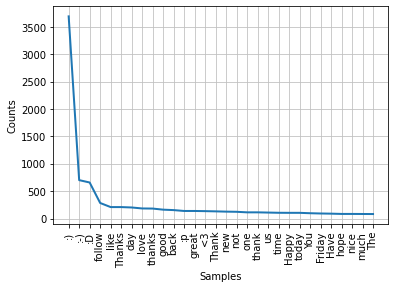

In [39]:
positive_frequency.plot(30,cumulative=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12299 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12299 missing from current font.
  font.set_text(s, 0, flags=flags)


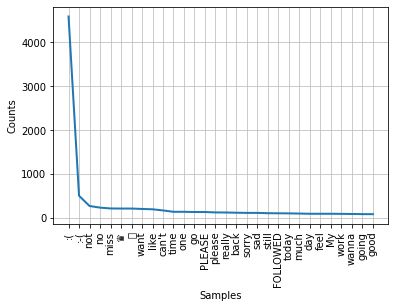

In [40]:
negative_frequency.plot(30,cumulative=False)
plt.show()

**WORD CLOUD** 

In [0]:
from wordcloud import WordCloud

In [0]:
final_data = positive_string_cleaned + negative_string_cleaned

In [43]:
print(final_data)

['#FollowFriday top engaged members community week :)', 'James How odd :/ Please call Contact Centre 02392441234 able assist :) Many thanks', 'listen last night :) As You Bleed amazing track When Scotland', 'CONGRATS :)', 'yeaaaah yippppy accnt verified rqst succeed blue tick mark fb profile :) 15 days', 'This one irresistible :) #FlipkartFashionFriday', 'We like keep lovely customers waiting long We hope enjoy Happy Friday LWWF :)', 'On second thought ’ not enough time DD :) But new shorts entering system Sheep must buying', 'Jgh go Bayan :D bye', 'As act mischievousness calling ETL layer in-house warehousing app Katamari Well … name implies :p', '#FollowFriday top influencers community week :)', "Who Wouldn't Love These Big Juicy Selfies :)", 'follow follow back :)', "Perfect already what's waiting :)", 'Great new opportunity junior triathletes aged 12 13 Gatorade series Get entries :)', 'Laying greetings card range print today love job :-)', "Friend's lunch yummmm :) #Nostalgia #TBS

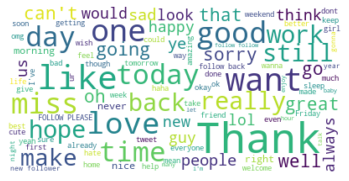

In [48]:
text = " ".join(word for word in final_data)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

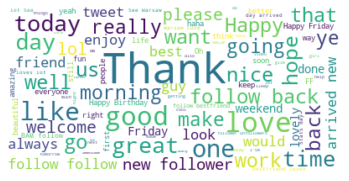

In [46]:
text = " ".join(word for word in positive_string_cleaned)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

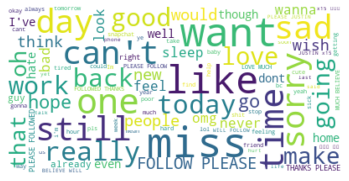

In [0]:
text = " ".join(word for word in negative_string_cleaned)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

# **STEP 4: BUILDING THE MULTINOMIAL NAIVE BAYESIAN CLASSIFIER**

**WORD DENSITY**

In [0]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

positive_words = get_all_words(positive_cleaned)
negative_words = get_all_words(negative_cleaned)

In [0]:
from nltk import FreqDist

positive_frequency = FreqDist(positive_words)
negative_frequency = FreqDist(negative_words)

In [0]:
df_positive_frequency = pd.DataFrame.from_dict(positive_frequency,orient = 'index')
df_positive_frequency.columns = ['Frequency']
df_positive_frequency.index.name = 'Term'

In [0]:
print(df_positive_frequency.head())

               Frequency
Term                    
#FollowFriday         25
top                   29
engaged                7
members               11
community             29


In [0]:
print(df_positive_frequency['Frequency']['top'])

29


In [0]:
df_negative_frequency = pd.DataFrame.from_dict(negative_frequency,orient = 'index')
df_negative_frequency.columns = ['Frequency']
df_negative_frequency.index.name = 'Term'

In [0]:
print(df_negative_frequency.head())

            Frequency
Term                 
hopeless            2
tmr                 2
:(               4585
Everything          3
kids                8


In [0]:
print(df_negative_frequency['Frequency']['kids'])

8


**FUNCTION TO IMPLEMENT ALGORITHM**

In [0]:
def clean(custom_tweet):
  #tokenise
  custom_tweet_tokenised = custom_tweet.split()
  
  #lemmatise
  custom_tweet_lemmatized = [None]*len(custom_tweet_tokenised)
  for i in range(len(custom_tweet_tokenised)):
    custom_tweet_lemmatized[i] = lemmatizer.lemmatize(custom_tweet_tokenised[i])

  #remove stop words
  custom_tweet_cleaned = []
  for w in custom_tweet_lemmatized:
    if(w.startswith('http:/') or w.startswith('https:/') or w.startswith('@')):
      continue;
    if w not in stop_words: 
      custom_tweet_cleaned.append(w)

  return custom_tweet_cleaned

In [0]:
def calculate(cleaned_custom_tweet, class_name):
  #class probability
  temp_dict = y_train.to_dict()
  class_count = 0
  for i in temp_dict:
    if(temp_dict[i] == class_name):
      class_count += 1
  class_prob = class_count/y_train.size

  #conditinal probability for each word
  conditional_prob = [None]*len(cleaned_custom_tweet)
  v = df_positive_frequency.size + df_negative_frequency.size
  
  total_positive_words = len(list(positive_words))
  total_negative_words = len(list(negative_words))
  for i in range(len(cleaned_custom_tweet)):
    value = 1
    #positive tweet set
    if class_name == 'Positive':
      if cleaned_custom_tweet[i] in df_positive_frequency['Frequency']:
        value += df_positive_frequency['Frequency'][cleaned_custom_tweet[i]] 
      conditional_prob[i] = value/(total_positive_words+v)
    #negative tweet set
    elif class_name == 'Negative':
      if cleaned_custom_tweet[i] in df_negative_frequency['Frequency']:
        value += df_negative_frequency['Frequency'][cleaned_custom_tweet[i]] 
    conditional_prob[i] = value/(total_negative_words+v)

  #calculating answer
  answer = class_prob
  for i in conditional_prob:
    answer *= i
  return answer

In [0]:
def MultinomialNaiveBayesianClassifier(custom_tweet):
  #cleaning the data
  cleaned_custom_tweet = clean(custom_tweet)
  #print("Cleaned tweet is: ", cleaned_custom_tweet)

  #finding the best suited class
  ans_df = pd.DataFrame(columns=['Class', 'Probability'])
  classes = ['Positive', 'Negative']
  ans_df['Class'] = classes
  for i in range(len(classes)):
    ans_df['Probability'][i] = calculate(cleaned_custom_tweet, classes[i])
  
  #returning the class
  if(ans_df['Probability'][0] > ans_df['Probability'][1]):
    return classes[0]
  else:
    return classes[1]

**TESTING THE MODEL WITH TESTING AND TRAINING DATA**

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [0]:
x = dataset['Cleaned']
y = dataset['Class']

In [0]:
size = [0.1,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracy_train = [None]*len(size)
accuracy_test =[None]*len(size)

for i in range(len(size)):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=size[i])

  #test set
  y_pred_test =[None]*x_test.size
  for j in range(x_test.size):
    y_pred_test[j] = MultinomialNaiveBayesianClassifier(x_test.iloc[j])
  y_test_list = list(y_test)
  accuracy_test[i] = accuracy_score(y_test_list, y_pred_test)


In [0]:
for i in range(len(accuracy_test)):
  accuracy_test[i] = accuracy_test[i]*100
print(accuracy_test)

[100.0, 100.0, 99.86666666666667, 99.875, 99.9, 99.91666666666667, 99.91428571428571, 99.875, 99.9]


**CHECKING WITH CUSTOM TWEET**

In [0]:
custom_tweet = input("Enter the custom tweet: ")
ans = MultinomialNaiveBayesianClassifier(custom_tweet)
print("The given tweet is ", ans)

Enter the custom tweet: i had an amazing day
The given tweet is  Positive
